<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(_3_2)_n30_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_-3.2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-3.2_n30.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,26.795682,40.507578,66.124573,0.000162,143.427995,143.427210,0.000785
1,0.0,1.0,32.602690,97.980255,39.166040,-0.001209,179.747776,179.749139,-0.001363
2,0.0,2.0,97.674448,74.937194,73.411121,0.001057,256.023820,256.021262,0.002558
3,0.0,3.0,91.815340,77.431276,91.376147,-0.001894,270.620869,270.620503,0.000366
4,0.0,4.0,27.539363,60.141611,81.441273,-0.001433,179.120813,179.120841,-0.000027
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,44.285612,77.970388,32.698064,0.000665,164.954728,164.954748,-0.000020
29996,999.0,26.0,47.074481,95.300003,43.752572,0.000691,196.127746,196.128523,-0.000777
29997,999.0,27.0,29.463118,47.309018,93.619850,-0.001995,180.389992,180.390135,-0.000143
29998,999.0,28.0,84.820200,79.064936,97.886339,-0.000525,271.770950,271.770738,0.000211


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    26.795682  40.507578  66.124573  0.000162  143.427995   
      1.0    32.602690  97.980255  39.166040 -0.001209  179.747776   
      2.0    97.674448  74.937194  73.411121  0.001057  256.023820   
      3.0    91.815340  77.431276  91.376147 -0.001894  270.620869   
      4.0    27.539363  60.141611  81.441273 -0.001433  179.120813   
...                ...        ...        ...       ...         ...   
999.0 25.0   44.285612  77.970388  32.698064  0.000665  164.954728   
      26.0   47.074481  95.300003  43.752572  0.000691  196.127746   
      27.0   29.463118  47.309018  93.619850 -0.001995  180.389992   
      28.0   84.820200  79.064936  97.886339 -0.000525  271.770950   
      29.0   40.798840  71.943140  71.766502 -0.001069  194.507412   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    143.427210  0.000785  
      1.0    179.749139 -0.001363  
      2.0    256.021262  0.002558  
      3.0    270.620503  0.000366  
      4.0    179.120841 -0.000027  
...                 ...       ...  
999.0 25.0   164.954748 -0.000020  
      26.0   196.128523 -0.000777  
      27.0   180.390135 -0.000143  
      28.0   271.770738  0.000211  
      29.0   194.508249 -0.000836  

[30000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    26.795682  40.507578  66.124573  0.000162  143.427995   
      1.0    32.602690  97.980255  39.166040 -0.001209  179.747776   
      2.0    97.674448  74.937194  73.411121  0.001057  256.023820   
      3.0    91.815340  77.431276  91.376147 -0.001894  270.620869   
      4.0    27.539363  60.141611  81.441273 -0.001433  179.120813   
...                ...        ...        ...       ...         ...   
999.0 25.0   44.285612  77.970388  32.698064  0.000665  164.954728   
      26.0   47.074481  95.300003  43.752572  0.000691  196.127746   
      27.0   29.463118  47.309018  93.619850 -0.001995  180.389992   
      28.0   84.820200  79.064936  97.886339 -0.000525  271.770950   
      29.0   40.798840  71.943140  71.766502 -0.001069  194.507412   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    143.427210  0.000785  
      1.0    179.749139 -0.001363  
      2.0    256.021262  0.002558  
      3.0    270.620503  0.000366  
      4.0    179.120841 -0.000027  
...                 ...       ...  
999.0 25.0   164.954748 -0.000020  
      26.0   196.128523 -0.000777  
      27.0   180.390135 -0.000143  
      28.0   271.770738  0.000211  
      29.0   194.508249 -0.000836  

[30000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,26.795682,40.507578,66.124573,0.000162,143.427995,143.427210,0.000785
1,0.0,1.0,32.602690,97.980255,39.166040,-0.001209,179.747776,179.749139,-0.001363
2,0.0,2.0,97.674448,74.937194,73.411121,0.001057,256.023820,256.021262,0.002558
3,0.0,3.0,91.815340,77.431276,91.376147,-0.001894,270.620869,270.620503,0.000366
4,0.0,4.0,27.539363,60.141611,81.441273,-0.001433,179.120813,179.120841,-0.000027
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,44.285612,77.970388,32.698064,0.000665,164.954728,164.954748,-0.000020
29996,999.0,26.0,47.074481,95.300003,43.752572,0.000691,196.127746,196.128523,-0.000777
29997,999.0,27.0,29.463118,47.309018,93.619850,-0.001995,180.389992,180.390135,-0.000143
29998,999.0,28.0,84.820200,79.064936,97.886339,-0.000525,271.770950,271.770738,0.000211


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    26.795682  40.507578  66.124573  0.000162  143.427995   
      1.0    32.602690  97.980255  39.166040 -0.001209  179.747776   
      2.0    97.674448  74.937194  73.411121  0.001057  256.023820   
      3.0    91.815340  77.431276  91.376147 -0.001894  270.620869   
      4.0    27.539363  60.141611  81.441273 -0.001433  179.120813   
...                ...        ...        ...       ...         ...   
999.0 25.0   44.285612  77.970388  32.698064  0.000665  164.954728   
      26.0   47.074481  95.300003  43.752572  0.000691  196.127746   
      27.0   29.463118  47.309018  93.619850 -0.001995  180.389992   
      28.0   84.820200  79.064936  97.886339 -0.000525  271.770950   
      29.0   40.798840  71.943140  71.766502 -0.001069  194.507412   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    143.427210  0.000785  
      1.0    179.749139 -0.001363  
      2.0    256.021262  0.002558  
      3.0    270.620503  0.000366  
      4.0    179.120841 -0.000027  
...                 ...       ...  
999.0 25.0   164.954748 -0.000020  
      26.0   196.128523 -0.000777  
      27.0   180.390135 -0.000143  
      28.0   271.770738  0.000211  
      29.0   194.508249 -0.000836  

[30000 rows x 7 columns]

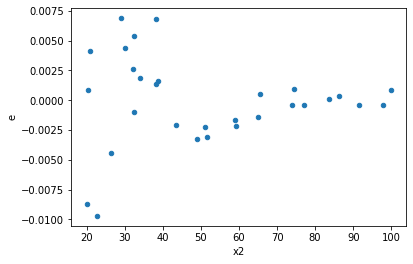

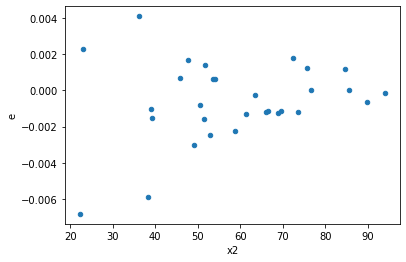

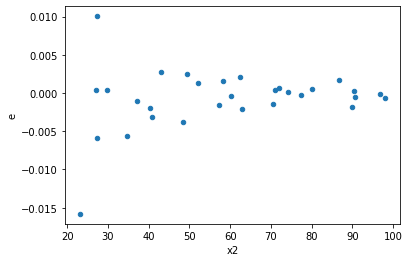

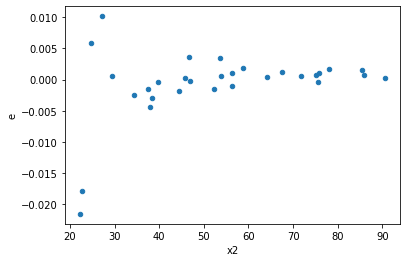

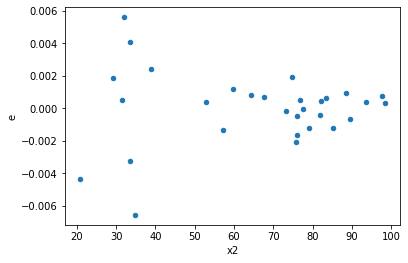

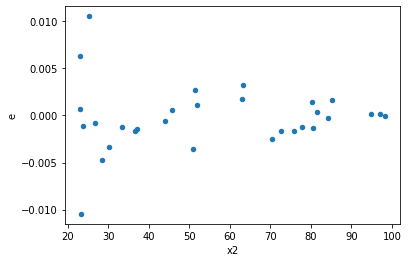

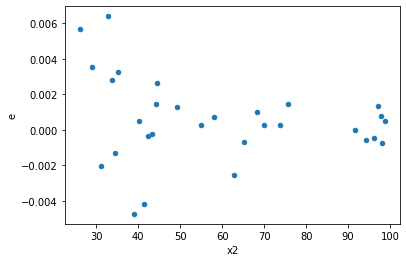

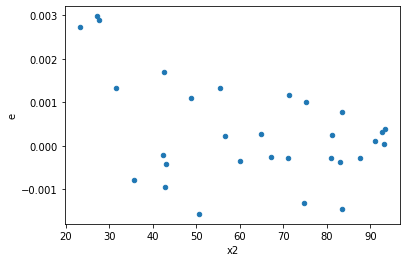

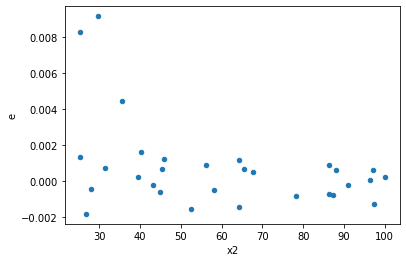

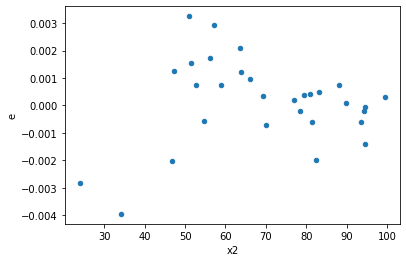

In [11]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
3.0,12.0,12.0,2.124003336695646e-05,3.340827854322058e-05,1.7700027805797048e-06,2.7840232119350485e-06,1.5728919990867107,0.44418714838307993,0.77790642580846,0.22209357419153997,Reject005=1 : Homoscedasticity
6.0,17.0,7.0,0.00025621273107811506,0.00013793958482831437,1.5071337122242062e-05,1.970565497547348e-05,1.3074921498764804,0.7523844240693873,0.6238077879653063,0.37619221203469366,Reject005=1 : Homoscedasticity
7.0,12.0,12.0,5.7250306654925495e-05,0.0001319730128315716,4.770858887910458e-06,1.0997751069297633e-05,2.305193116729225,0.16230332073787945,0.9188483396310603,0.08115166036893973,Reject005=1 : Homoscedasticity
9.0,11.0,13.0,8.71009002466949e-06,0.00015780282277623936,7.918263658790446e-07,1.2138678675095335e-05,15.329975355922384,2.199046690809503e-05,0.999989004766546,1.0995233454047515e-05,Reject005=0 : Heteroscedasticity
11.0,13.0,11.0,1.6464067485413993e-05,0.00010215175903143457,1.2664667296472301e-06,9.286523548312233e-06,7.332623377243365,0.0022250018365082003,0.9988874990817459,0.0011125009182541001,Reject005=0 : Heteroscedasticity
12.0,18.0,6.0,0.00023908875665734682,0.00011517436761372251,1.3282708703185934e-05,1.9195727935620417e-05,1.4451666722929948,0.6817846380004884,0.6591076809997558,0.3408923190002442,Reject005=1 : Homoscedasticity
16.0,12.0,12.0,2.0867876642611715e-05,8.928012765325633e-05,1.738989720217643e-06,7.440010637771361e-06,4.278352281944604,0.017758655862458506,0.9911206720687707,0.008879327931229253,Reject005=0 : Heteroscedasticity
20.0,16.0,8.0,7.89475828725685e-05,0.0001485526252887843,4.9342239295355315e-06,1.8569078161098038e-05,3.763322951345255,0.0632609748450017,0.9683695125774991,0.03163048742250085,Reject005=1 : Homoscedasticity
23.0,19.0,5.0,4.596050175485578e-05,3.420947930765546e-05,2.4189737765713565e-06,6.841895861531092e-06,2.828429116428359,0.2528273964168668,0.8735863017915666,0.1264136982084334,Reject005=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,8.0,16.0,8.195126117079379e-05,0.0001082938623225921,1.0243907646349224e-05,6.7683663951620065e-06,0.6607211455653987,0.5641838741184053,Reject005=1 : Homoscedasticity
1.0,19.0,5.0,0.00014096370965502168,3.144594427286801e-06,7.4191426134221936e-06,6.289188854573601e-07,0.08476975281747032,5.4481763168296125e-05,Reject005=0 : Heteroscedasticity
2.0,6.0,18.0,0.0001078901799901179,0.00019398982114727462,1.798169666501965e-05,1.07772122859597e-05,0.5993434594481256,0.5454777671400965,Reject005=1 : Homoscedasticity
3.0,12.0,12.0,2.124003336695646e-05,3.340827854322058e-05,1.7700027805797048e-06,2.7840232119350485e-06,1.5728919990867107,0.44418714838307993,Reject005=1 : Homoscedasticity
4.0,10.0,14.0,8.873150560979724e-05,3.776473832932902e-05,8.873150560979724e-06,2.697481309237787e-06,0.30400490679152253,0.06445024126233162,Reject005=1 : Homoscedasticity
5.0,10.0,14.0,0.0001393419597756969,8.626176872042713e-06,1.393419597756969e-05,6.161554908601938e-07,0.044218948251627754,2.129749283471118e-05,Reject005=0 : Heteroscedasticity
6.0,17.0,7.0,0.00025621273107811506,0.00013793958482831437,1.5071337122242062e-05,1.970565497547348e-05,1.3074921498764804,0.7523844240693873,Reject005=1 : Homoscedasticity
7.0,12.0,12.0,5.7250306654925495e-05,0.0001319730128315716,4.770858887910458e-06,1.0997751069297633e-05,2.305193116729225,0.16230332073787945,Reject005=1 : Homoscedasticity
8.0,11.0,13.0,0.00023349896096192508,0.0001035360582401452,2.1227178269265918e-05,7.964312172318862e-06,0.37519410593776886,0.11190924179801373,Reject005=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    589
Reject005=1 : Homoscedasticity      411
Name: Result_test, dtype: int64